In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from matplotlib.ticker import FuncFormatter

In [2]:
df_analise_grafica = pd.read_csv('Data/output/base_final.csv', encoding="utf-8")
df_analise_grafica

,País,Ano,Litros,Valor,TempAr,Precipitacao,Inflação,PIB_Brasil_Trilhoes,PIB_RS_Trilhoes,USD BRL,ValorPorLitro
0,Afeganistão,2007,0.0,0.0,18.2,0.8,4.46,2.720,0.168,1.95095,NaN
1,Nova Zelândia,2007,0.0,0.0,18.2,0.8,4.46,2.720,0.168,1.95095,NaN
2,Nova Caledônia,2007,0.0,0.0,18.2,0.8,4.46,2.720,0.168,1.95095,NaN
3,Noruega,2007,10044.0,10044.0,18.2,0.8,4.46,2.720,0.168,1.95095,1.00
4,Nigéria,2007,0.0,0.0,18.2,0.8,4.46,2.720,0.168,1.95095,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1915,Congo,2021,0.0,0.0,17.7,0.8,10.06,9.012,0.581,5.27075,NaN
1916,Comores,2021,0.0,0.0,17.7,0.8,10.06,9.012,0.581,5.27075,NaN
1917,"Cocos (Keeling), Ilhas",2021,0.0,0.0,17.7,0.8,10.06,9.012,0.581,5.27075,NaN
1918,Haiti,2021,670379.0,831181.0,17.7,0.8,10.06,9.012,0.581,5.27075,1.24


In [38]:
# Agrupando por País e Ano e somando os valores de Total_Litros e Valor
df_agrupamento_ano = df_analise_grafica.groupby(['País', 'Ano']).agg({'Litros': 'sum', 'Valor': 'sum'}).reset_index()

In [39]:
# Exportação ultimos 15 anos agrupados por Ano
df_grupo_ano = df_analise_grafica.groupby("Ano").sum().reset_index()

# Exportação ultimos 15 anos agrupados por Pais
df_grupo_pais = df_analise_grafica.groupby("País").sum().reset_index()

In [40]:
# adicionando o valor do litro 
df_grupo_ano['valor_litro'] = df_grupo_ano['Valor'] / df_grupo_ano['Litros']

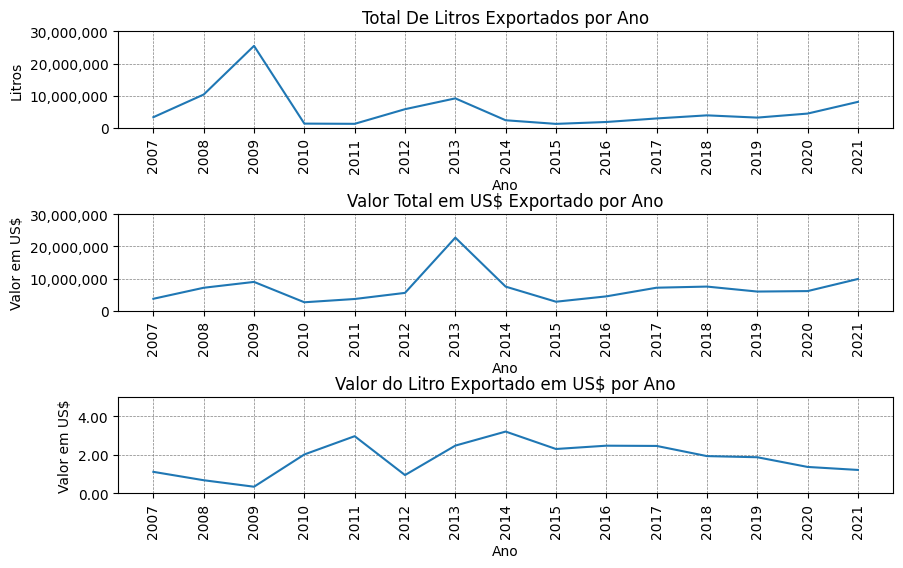

In [41]:
# Valor total Exportado - Ano
plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
graph = sns.lineplot(x='Ano', y='Valor', data=df_grupo_ano)
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.ylim(0,30000000)
plt.xlabel('Ano')
plt.ylabel('Valor em US$')
plt.title("Valor Total em US$ Exportado por Ano")
plt.xticks(df_grupo_ano['Ano'][::1],rotation=90)

# Valor do litro Exportado - Ano
plt.subplot(3,1,3)
graph = sns.lineplot(x='Ano', y='valor_litro', data=df_grupo_ano)
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.ylim(0,5.0)
plt.xlabel('Ano')
plt.ylabel('Valor em US$')
plt.title("Valor do Litro Exportado em US$ por Ano")
plt.xticks(df_grupo_ano['Ano'][::1],rotation=90)
plt.subplots_adjust(hspace=0.9)

#Valor total litos exportado - Ano
plt.subplot(3,1,1)
graph = sns.lineplot(x='Ano', y='Litros', data=df_grupo_ano)
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.ylim(0,30000000)
plt.xlabel('Ano')
plt.ylabel('Litros')
plt.title('Total De Litros Exportados por Ano')
plt.xticks(df_grupo_ano['Ano'][::1],rotation=90)

plt.show()

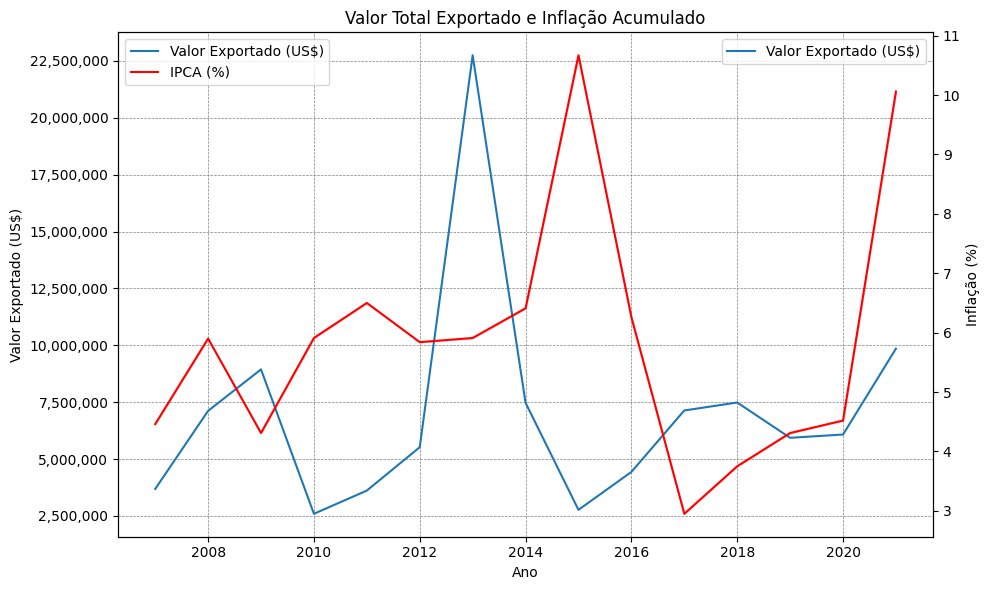

In [42]:
#valor exportado em US$ x IPCA

fig, tab1 = plt.subplots(figsize=(10, 6))

# Valor total exportado
graph4 = sns.lineplot(x='Ano', y='Valor', data=df_grupo_ano, ax=tab1, label='Valor Exportado (US$)')
graph4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
tab1.set_ylabel('Valor Exportado (US$)')
tab1.set_xlabel('Ano')
tab1.grid(True, linestyle='--', linewidth=0.5, color='gray')
tab1.set_title('Valor Total Exportado e Inflação Acumulado')

# Escala secundária para o IPCA
tab2 = tab1.twinx()
sns.lineplot(x='Ano', y='Inflação', data=df_analise_grafica, ax=tab2, color='red', label='IPCA (%)')
tab2.set_ylabel('Inflação (%)')

# Legenda
lines, labels = tab1.get_legend_handles_labels()
lines2, labels2 = tab2.get_legend_handles_labels()
tab2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [53]:
df_grupo_ano

,Ano,País,Litros,Valor,TempAr,Precipitacao,Inflação,PIB_Brasil_Trilhoes,PIB_RS_Trilhoes,USD BRL,ValorPorLitro,valor_litro
0,2007,AfeganistãoNova ZelândiaNova CaledôniaNoruegaN...,3281752.0,3686150.0,2329.6,102.4,570.88,348.160,21.504,249.7216,83.55,1.123226
1,2008,"MoçambiqueMaltaMarshall, IlhasMauritâniaMéxico...",10346323.0,7118100.0,2227.2,102.4,755.20,398.080,24.320,220.1408,151.00,0.687984
2,2009,"MoçambiqueMaltaMarshall, IlhasMauritâniaMéxico...",25514198.0,8940988.0,2329.6,102.4,551.68,426.624,26.112,248.8192,121.79,0.350432
3,2010,"Marshall, IlhasMauritâniaMéxicoMoçambiqueMonte...",1280574.0,2595303.0,2227.2,102.4,756.48,497.408,30.848,226.1376,140.30,2.026672
4,2011,"MalásiaMaltaMarshall, IlhasMauritâniaMéxicoMoç...",1214834.0,3615120.0,2214.4,102.4,832.00,560.128,33.920,213.5936,179.91,2.975814
5,2012,"MéxicoMauritâniaOmãMaltaMarshall, IlhasMoçambi...",5775376.0,5521293.0,2393.6,128.0,747.52,616.320,36.864,258.3872,235.46,0.956006
6,2013,"MaltaMarshall, IlhasMauritâniaMéxicoMoçambique...",9149059.0,22744845.0,2201.6,102.4,756.48,682.496,42.496,276.3840,174.65,2.486031
7,2014,"MoçambiqueMéxicoPaíses BaixosMarshall, IlhasMa...",2324029.0,7472795.0,2342.4,128.0,820.48,739.712,45.824,299.9744,187.63,3.215448
8,2015,"MoçambiqueMéxicoPaíses BaixosMarshall, IlhasMa...",1198479.0,2769160.0,2393.6,102.4,1365.76,767.488,48.896,408.2944,119.40,2.310562
9,2016,"Marshall, IlhasMauritâniaMéxicoMoçambiqueMonte...",1786549.0,4434704.0,2265.6,128.0,801.28,802.432,52.352,442.9696,169.20,2.482274


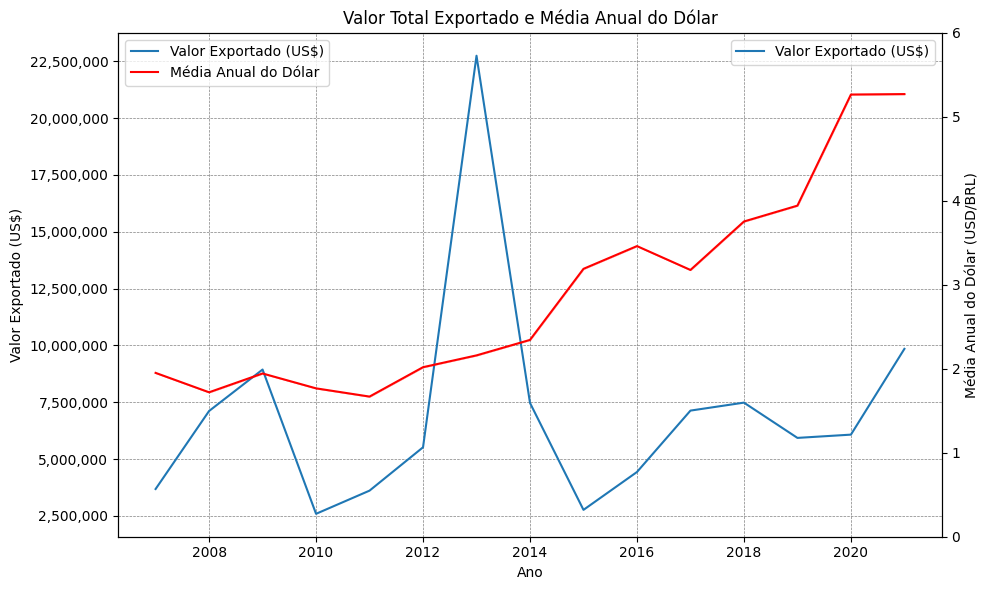

In [43]:
# #valor exportado em US$ x USD BRL - Ajustar o valor considerado no dolar esta errado
fig, tab3 = plt.subplots(figsize=(10, 6))

# Valor total exportado
graph5 = sns.lineplot(x='Ano', y='Valor', data=df_grupo_ano, ax=tab3, label='Valor Exportado (US$)')
graph5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
tab3.set_ylabel('Valor Exportado (US$)')
tab3.set_xlabel('Ano')
tab3.grid(True, linestyle='--', linewidth=0.5, color='gray')
tab3.set_title('Valor Total Exportado e Média Anual do Dólar')

# Escala secundária para o dólar
tab4 = tab3.twinx()
sns.lineplot(x='Ano', y='USD BRL', data=df_analise_grafica, ax=tab4, color='red', label='Média Anual do Dólar')
tab4.set_ylabel('Média Anual do Dólar (USD/BRL)')
tab4.set_ylim(0, 6)

# Legenda
lines, labels = tab3.get_legend_handles_labels()
lines2, labels2 = tab4.get_legend_handles_labels()
tab4.legend(lines + lines2, labels + labels2, loc='upper left')

# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()

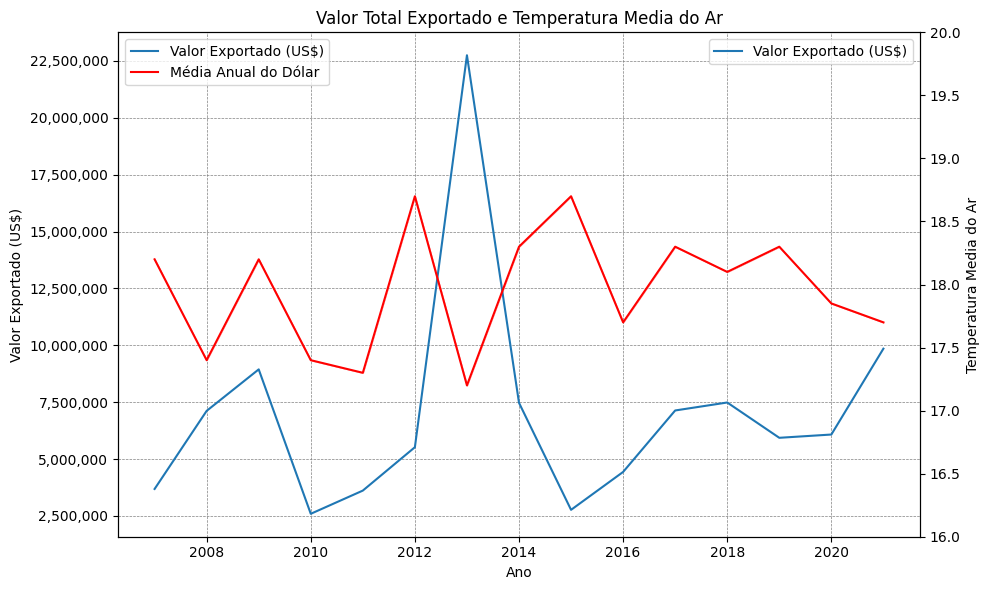

In [52]:
# #valor exportado em US$ x temperatura
fig, tab3 = plt.subplots(figsize=(10, 6))

# Valor total exportado
graph5 = sns.lineplot(x='Ano', y='Valor', data=df_grupo_ano, ax=tab3, label='Valor Exportado (US$)')
graph5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
tab3.set_ylabel('Valor Exportado (US$)')
tab3.set_xlabel('Ano')
tab3.grid(True, linestyle='--', linewidth=0.5, color='gray')
tab3.set_title('Valor Total Exportado e Temperatura Media do Ar')

# Escala secundária para o dólar
tab4 = tab3.twinx()
sns.lineplot(x='Ano', y='TempAr', data=df_analise_grafica, ax=tab4, color='red', label='Média Anual do Dólar')
tab4.set_ylabel('Temperatura Media do Ar')
tab4.set_ylim(16, 20)

# Legenda
lines, labels = tab3.get_legend_handles_labels()
lines2, labels2 = tab4.get_legend_handles_labels()
tab4.legend(lines + lines2, labels + labels2, loc='upper left')

# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()

In [45]:
# Lista de Paises por continentes
df_paises_continente = {
    'Afeganistão': 'Ásia',
    'Alemanha': 'Europa',
    'Angola': 'África',
    'Anguilla': 'América do Norte',
    'Antilhas Holandesas': 'América do Norte',
    'Antígua e Barbuda': 'América do Norte',
    'Argentina': 'América do Sul',
    'Aruba': 'América do Norte',
    'Austrália': 'Oceania',
    'Bahamas': 'América do Norte',
    'Bangladesh': 'Ásia',
    'Barbados': 'América do Norte',
    'Barein': 'Ásia',
    'Belice': 'América do Norte',
    'Benin': 'África',
    'Bolívia': 'América do Sul',
    'Brasil': 'América do Sul',
    'Bulgária': 'Europa',
    'Bélgica': 'Europa',
    'Bósnia-Herzegovina': 'Europa',
    'Cabo Verde': 'África',
    'Camarões': 'África',
    'Canadá': 'América do Norte',
    'Catar': 'Ásia',
    'Cayman, Ilhas': 'América do Norte',
    'Chile': 'América do Sul',
    'China': 'Ásia',
    'Chipre': 'Europa',
    'Cingapura': 'Ásia',
    'Cocos (Keeling), Ilhas': 'Oceania',
    'Colômbia': 'América do Sul',
    'Comores': 'África',
    'Congo': 'África',
    'Coreia, Republica Sul': 'Ásia',
    'Costa Rica': 'América do Norte',
    'Costa do Marfim': 'África',
    'Croácia': 'Europa',
    'Cuba': 'América do Norte',
    'Curaçao': 'América do Norte',
    'Dinamarca': 'Europa',
    'Dominica': 'América do Norte',
    'El Salvador': 'América do Norte',
    'Emirados Arabes Unidos': 'Ásia',
    'Equador': 'América do Sul',
    'Eslovaca, Republica': 'Europa',
    'Espanha': 'Europa',
    'Estados Unidos': 'América do Norte',
    'Estônia': 'Europa',
    'Filipinas': 'Ásia',
    'Finlândia': 'Europa',
    'França': 'Europa',
    'Gana': 'África',
    'Gibraltar': 'Europa',
    'Granada': 'América do Norte',
    'Grécia': 'Europa',
    'Guatemala': 'América do Norte',
    'Guiana': 'América do Sul',
    'Guiana Francesa': 'América do Sul',
    'Guine Bissau': 'África',
    'Guine Equatorial': 'África',
    'Haiti': 'América do Norte',
    'Honduras': 'América do Norte',
    'Hong Kong': 'Ásia',
    'Hungria': 'Europa',
    'Ilha de Man': 'Europa',
    'Ilhas Virgens': 'América do Norte',
    'India': 'Ásia',
    'Indonésia': 'Ásia',
    'Iraque': 'Ásia',
    'Irlanda': 'Europa',
    'Irã': 'Ásia',
    'Itália': 'Europa',
    'Jamaica': 'América do Norte',
    'Japão': 'Ásia',
    'Jordânia': 'Ásia',
    'Letônia': 'Europa',
    'Libéria': 'África',
    'Luxemburgo': 'Europa',
    'Líbano': 'Ásia',
    'Malta': 'Europa',
    'Malásia': 'Ásia',
    'Marshall, Ilhas': 'Oceania',
    'Mauritânia': 'África',
    'Montenegro': 'Europa',
    'Moçambique': 'África',
    'México': 'América do Norte',
    'Namibia': 'África',
    'Nicaragua': 'América do Norte',
    'Nigéria': 'África',
    'Noruega': 'Europa',
    'Nova Caledônia': 'Oceania',
    'Nova Zelândia': 'Oceania',
    'Omã': 'Ásia',
    'Panamá': 'América do Norte',
    'Paraguai': 'América do Sul',
    'Países Baixos': 'Europa',
    'Peru': 'América do Sul',
    'Polônia': 'Europa',
    'Porto Rico': 'América do Norte',
    'Portugal': 'Europa',
    'Quênia': 'África',
    'Reino Unido': 'Europa',
    'República Dominicana': 'América do Norte',
    'Rússia': 'Europa/Ásia',
    'Senegal': 'África',
    'Serra Leoa': 'África',
    'Singapura': 'Ásia',
    'Suazilândia': 'África',
    'Suriname': 'América do Sul',
    'Suécia': 'Europa',
    'Suíça': 'Europa',
    'São Tomé e Príncipe': 'África',
    'São Vicente e Granadinas': 'América do Norte',
    'Tailândia': 'Ásia',
    'Taiwan (FORMOSA)': 'Ásia',
    'Tanzânia': 'África',
    'Tcheca, República': 'Europa',
    'Togo': 'África',
    'Trinidade Tobago': 'América do Norte',
    'Tunísia': 'África',
    'Turquia': 'Europa/Ásia',
    'Tuvalu': 'Oceania',
    'Uruguai': 'América do Sul',
    'Vanuatu': 'Oceania',
    'Venezuela': 'América do Sul',
    'Vietnã': 'Ásia',
    'África do Sul': 'África',
    'Áustria': 'Europa'
}

In [46]:
# Função para formatar os valores do eixo y em milhões
def milhoes_formatter(x, pos):
    return '{:.0f}M'.format(x * 1e-6)
warnings.filterwarnings('ignore')

In [47]:
# Paleta de cores personalizada
cores = ["#dbda97", "#efae54", "#ef6771", "#d62728", "#4b1d37"]

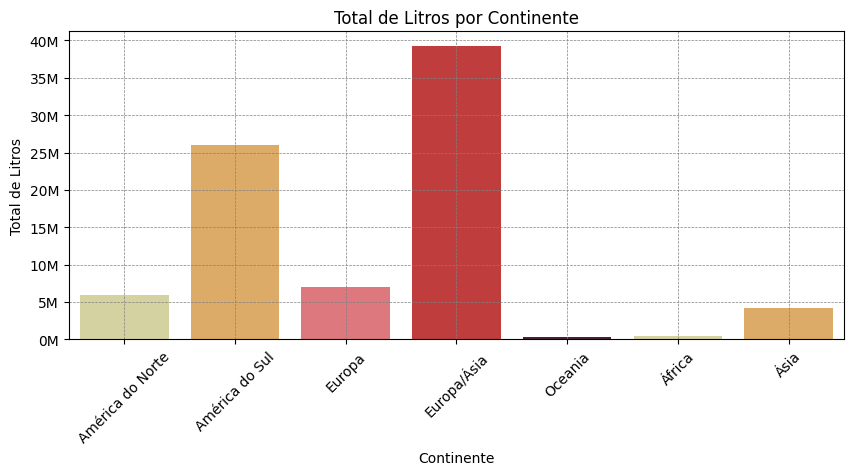

In [48]:
#Litros Exportados por Continente
df_grupo_pais['Continente'] = df_grupo_pais['País'].map(df_paises_continente)
df_continentes_agrupados = df_grupo_pais.groupby('Continente').sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Continente', y='Litros', data= df_continentes_agrupados, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Continente')
plt.ylabel('Total de Litros')
plt.title('Total de Litros por Continente')
plt.xticks(rotation=45)


plt.show()
plt.close()

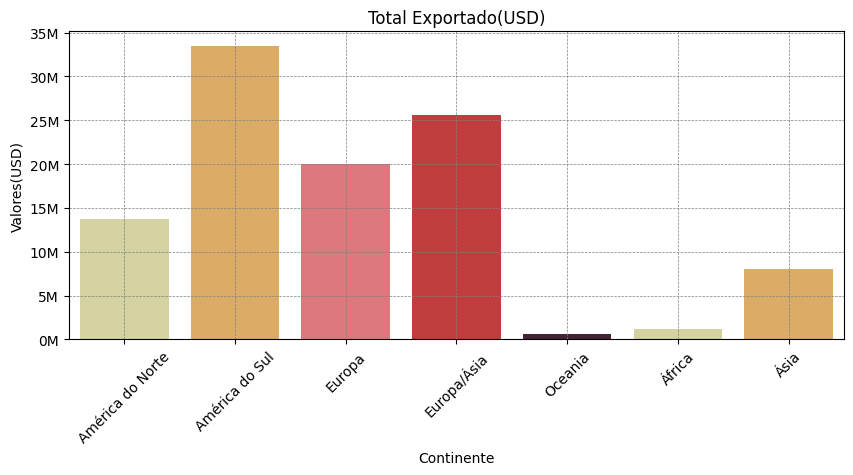

In [19]:
#Lvalores Exportados por Continente
df_grupo_pais['Continente'] = df_grupo_pais['País'].map(df_paises_continente)
df_continentes_agrupados = df_grupo_pais.groupby('Continente').sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Continente', y='Valor', data= df_continentes_agrupados, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Continente')
plt.ylabel('Valores(USD)')
plt.title('Total Exportado(USD)')
plt.xticks(rotation=45)


plt.show()
plt.close()

NameError: name 'top_15_valor' is not defined

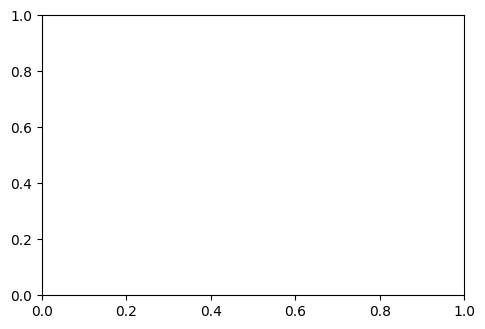

In [20]:
plt.figure(figsize=(12,8))

# Intervalor eixo Y
intervalo_y = 10000000 
valor_minimo = 0  
valor_maximo = 50000000   
valores_ticks_y = np.arange(valor_minimo, valor_maximo + 1, intervalo_y)

plt.subplot(2,2,2)
graph = sns.barplot(x='País', y='Valor', data=top_15_valor, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.yticks(valores_ticks_y)
plt.xlabel('País')
plt.ylabel('Valor em US$')
plt.title('Valor US$ por País')
plt.xticks(rotation=80)

# Top 15 Litros
intervalo_y = 10000000 
valor_minimo = 0  
valor_maximo = 50000000   
valores_ticks_y1 = np.arange(valor_minimo, valor_maximo + 1, intervalo_y)

plt.subplot(2,2,1)
graph = sns.barplot(x='País', y='Litros', data=top_15_litros, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.yticks(valores_ticks_y1)
plt.xlabel('País')
plt.ylabel('Litros')
plt.title('Total De Litros no ano por País')
plt.xticks(rotation=80)

plt.subplots_adjust(hspace=1.2)

plt.show()

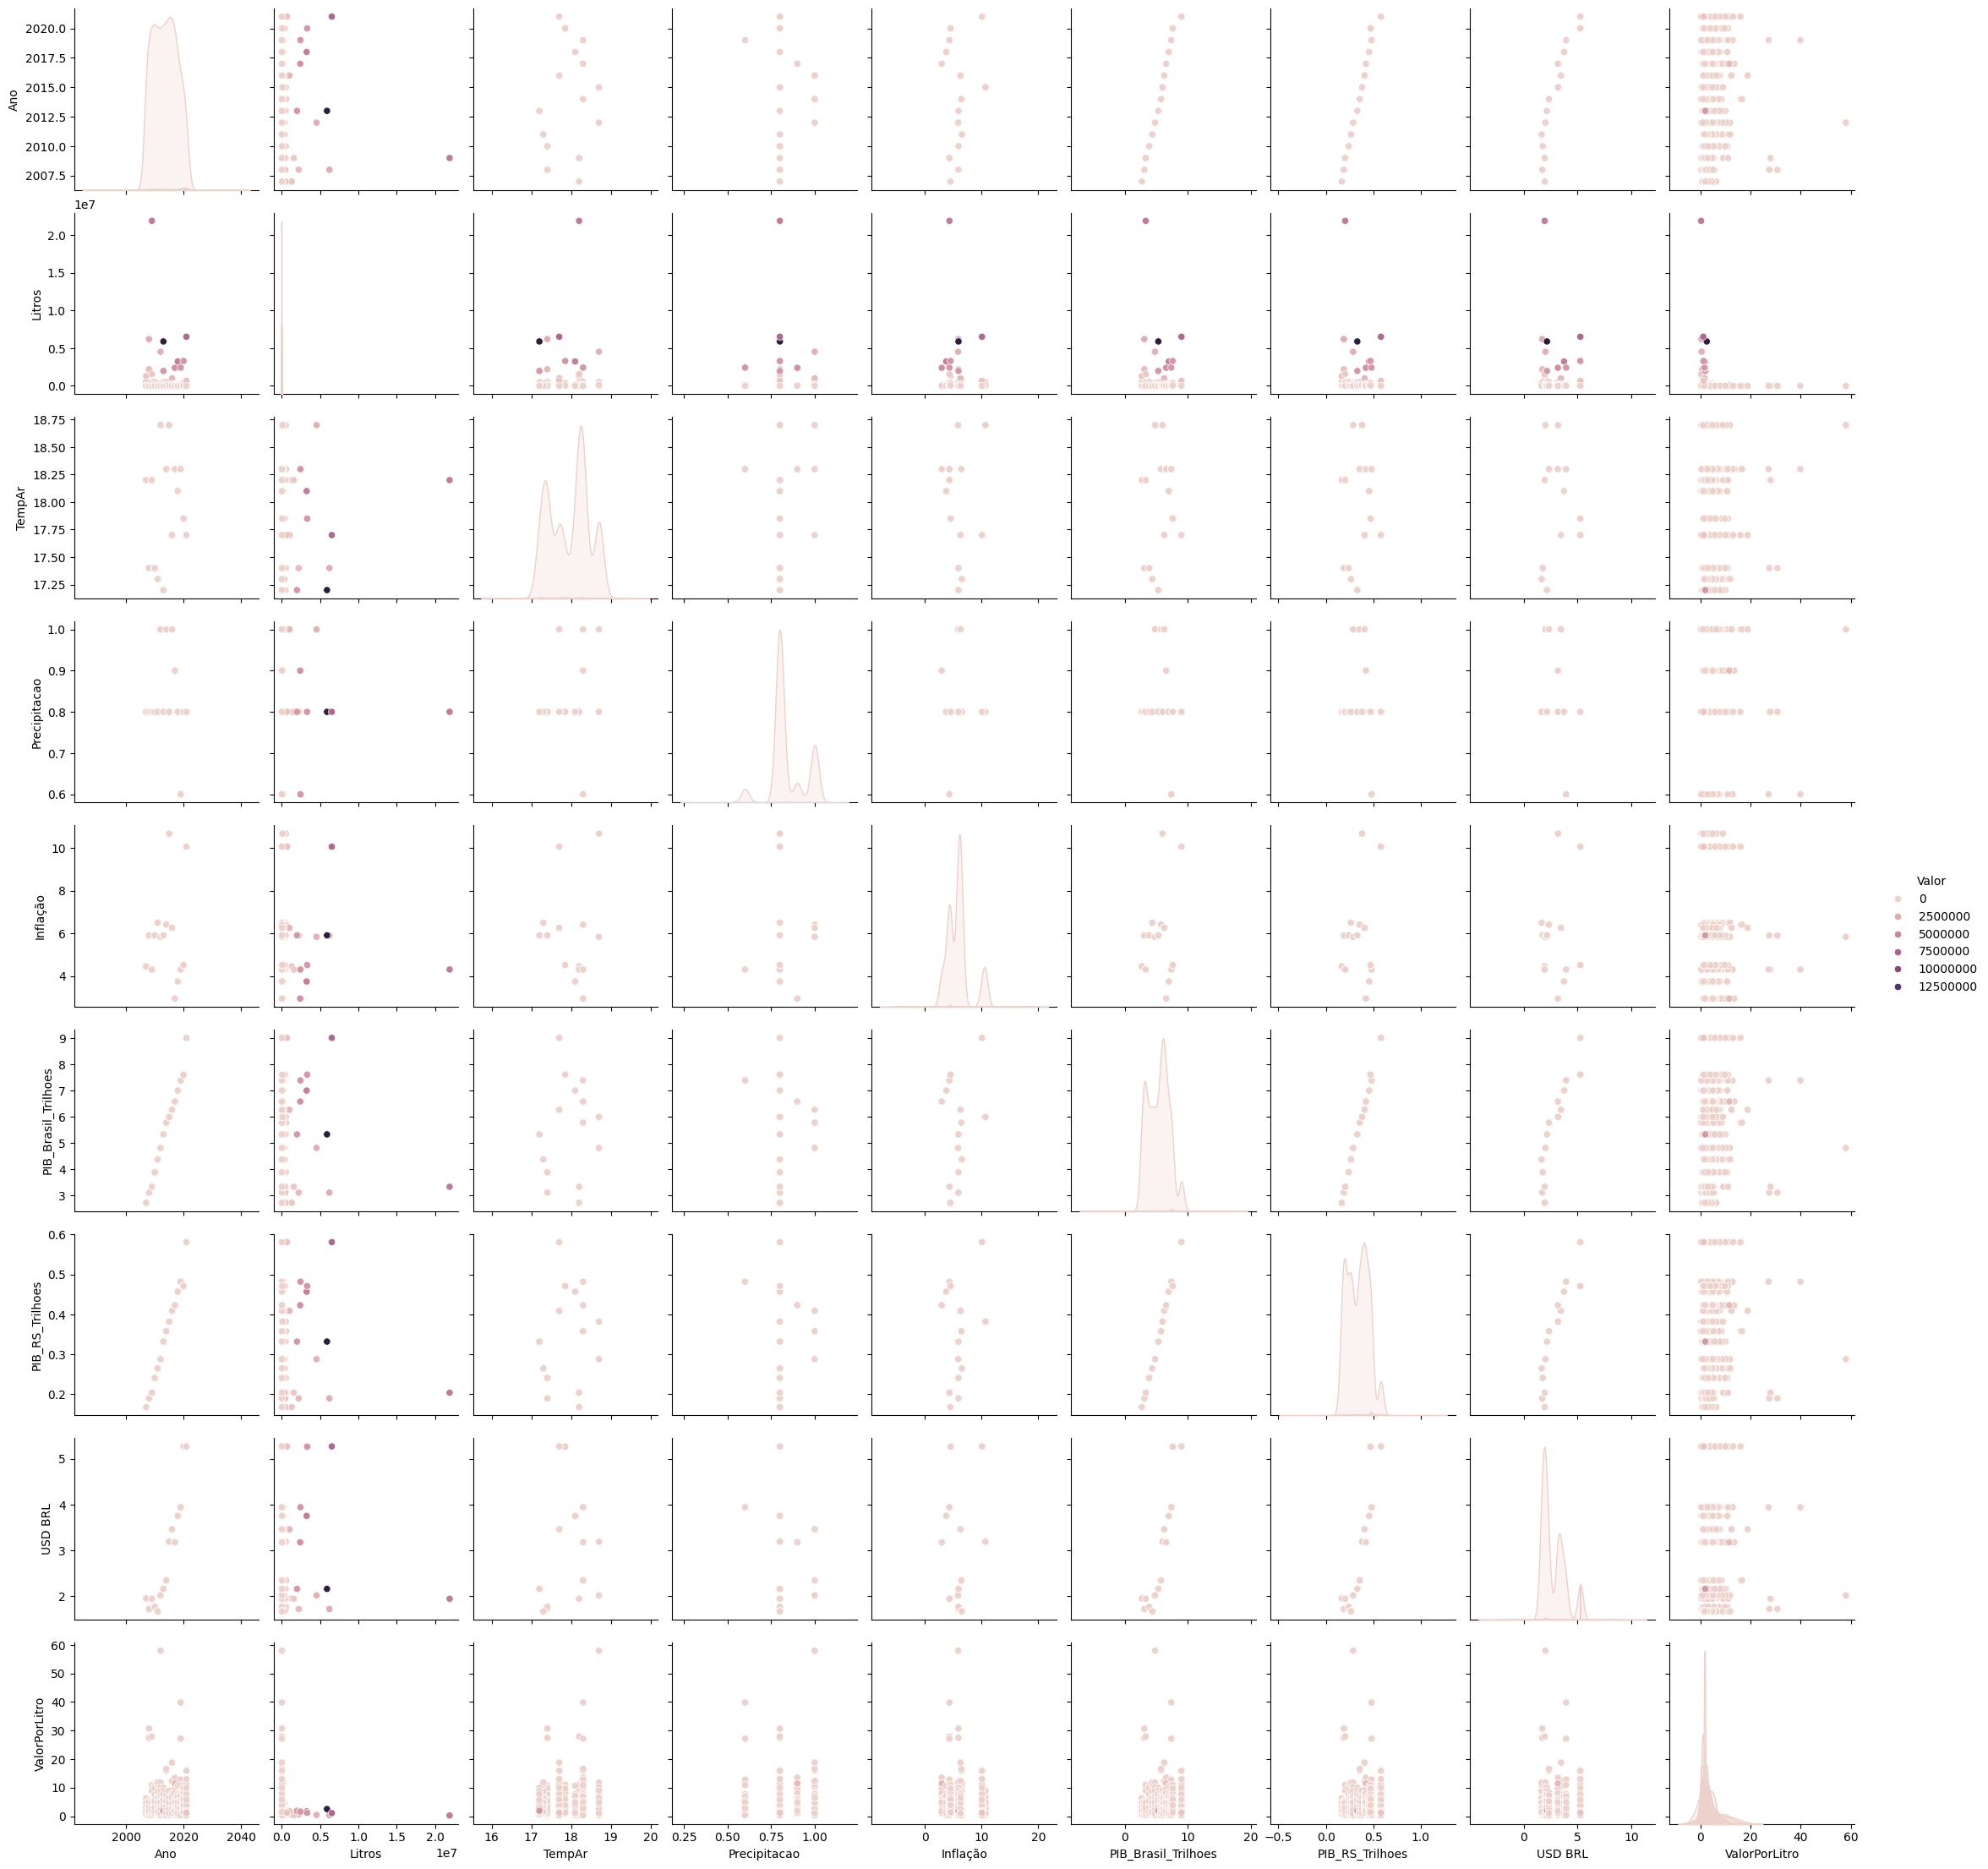

In [ ]:
sns.pairplot(df_analise_grafica, hue = 'Valor') 